# Notebook 01 — Data Loading & Exploration

This notebook loads the two datasets used in this project and performs initial exploration:

| Dataset | Type | Classes | Samples |
|---|---|---|---|
| **XPQRS** | Raw waveform signals (100 samples/signal) | 17 | 17,000 |
| **PQ Disturbances** | Pre-extracted wavelet features (72 features) | 13 | ~798 |

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('../src'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import (
    load_xpqrs, load_xpqrs_as_dataframe,
    load_pq_disturbances, load_pq_disturbances_as_dataframe,
    XPQRS_CLASSES, SAMPLING_RATE, SIGNAL_LENGTH, SIGNAL_DURATION
)
from visualization import plot_class_distribution

sns.set_theme(style='whitegrid')
%matplotlib inline

XPQRS_DIR = '../dataset/XPQRS/'
PQ_DIR    = '../dataset/PQ Disturbances Dataset/'

## 1. Load XPQRS Dataset

17 CSV files with 1,000 raw waveform signals each. Each signal has 100 sample points
(one cycle at 50 Hz, sampled at 5 kHz, 20 ms duration, amplitude scaled to ±1).

In [2]:
xpqrs_signals, xpqrs_labels = load_xpqrs(XPQRS_DIR)

print(f'Signals shape : {xpqrs_signals.shape}')
print(f'Labels shape  : {xpqrs_labels.shape}')
print(f'Unique classes: {len(np.unique(xpqrs_labels))}')
print(f'Amplitude range: [{xpqrs_signals.min():.4f}, {xpqrs_signals.max():.4f}]')
print(f'Any NaN: {np.isnan(xpqrs_signals).any()}')
print(f'Any Inf: {np.isinf(xpqrs_signals).any()}')

Signals shape : (17000, 100)
Labels shape  : (17000,)
Unique classes: 17
Amplitude range: [-2.4601, 2.4857]
Any NaN: False
Any Inf: False


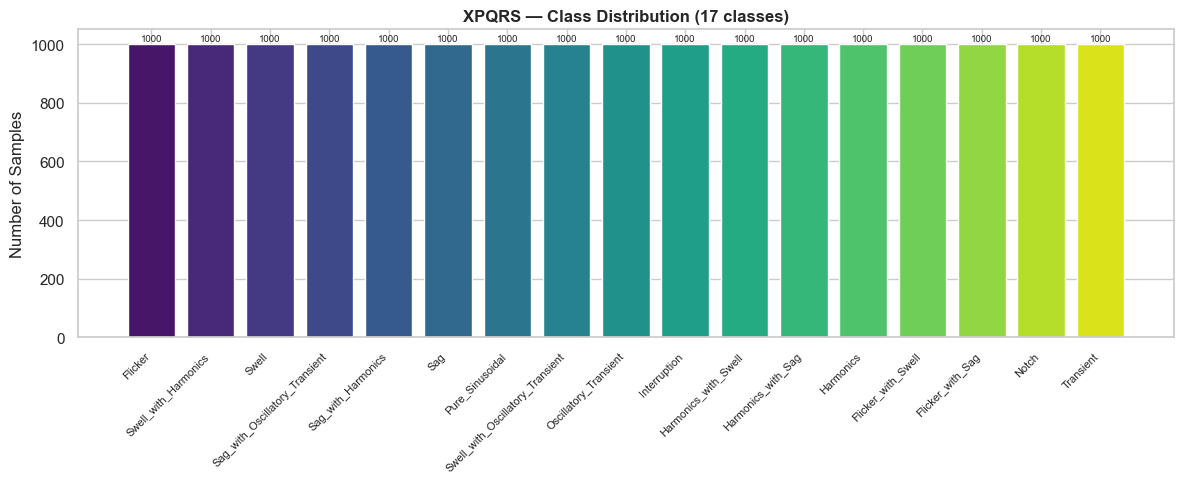

In [3]:
# Class distribution
fig = plot_class_distribution(xpqrs_labels, title='XPQRS — Class Distribution (17 classes)')
fig.savefig('../results/figures/xpqrs_class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [4]:
# Per-class statistics
xpqrs_df = load_xpqrs_as_dataframe(XPQRS_DIR)
signal_cols = [c for c in xpqrs_df.columns if c != 'label']

stats = xpqrs_df.groupby('label')[signal_cols].agg(['mean', 'std']).reset_index()

# Summarise per class: mean of mean, mean of std, min, max across all samples
summary = []
for cls in sorted(xpqrs_df['label'].unique()):
    cls_data = xpqrs_signals[xpqrs_labels == cls]
    summary.append({
        'Class': cls,
        'Count': len(cls_data),
        'Mean Amplitude': f'{cls_data.mean():.6f}',
        'Std Amplitude': f'{cls_data.std():.4f}',
        'Min': f'{cls_data.min():.4f}',
        'Max': f'{cls_data.max():.4f}',
        'RMS': f'{np.sqrt(np.mean(cls_data**2)):.4f}'
    })

summary_df = pd.DataFrame(summary)
summary_df

,Class,Count,Mean Amplitude,Std Amplitude,Min,Max,RMS
0,Flicker,1000,-0.000058,0.7421,-1.0995,1.0983,0.7421
1,Flicker_with_Sag,1000,0.007458,0.5763,-1.0973,1.0930,0.5764
2,Flicker_with_Swell,1000,0.002150,0.9478,-1.8800,1.8922,0.9478
3,Harmonics,1000,0.000000,0.7184,-1.3935,1.3935,0.7184
4,Harmonics_with_Sag,1000,-0.001372,0.5534,-1.2743,1.2696,0.5534
5,Harmonics_with_Swell,1000,-0.002442,0.9231,-2.1858,2.1204,0.9231
6,Interruption,1000,0.146294,0.4255,-1.0000,1.0000,0.4500
7,Notch,1000,0.000002,0.6895,-1.0000,1.0000,0.6895
8,Oscillatory_Transient,1000,-0.000266,0.7289,-1.7456,1.7613,0.7289
9,Pure_Sinusoidal,1000,-0.000000,0.7071,-1.0000,1.0000,0.7071


## 2. Load PQ Disturbances Dataset

13 individual Excel files containing **pre-extracted wavelet features**:
8 statistical measures (Mean, Std, RMS, Range, Energy, Kurtosis, Skewness, Entropy)
across 9 wavelet sub-bands (d1–d8, A8) = **72 features** per sample.

In [5]:
pq_features, pq_labels, pq_feature_names = load_pq_disturbances(PQ_DIR)

print(f'Features shape : {pq_features.shape}')
print(f'Labels shape   : {pq_labels.shape}')
print(f'Unique classes : {len(np.unique(pq_labels))}')
print(f'Classes        : {list(np.unique(pq_labels))}')
print(f'Feature count  : {len(pq_feature_names)}')
print(f'Any NaN: {np.isnan(pq_features).any()}')

Features shape : (798, 72)
Labels shape   : (798,)
Unique classes : 13
Classes        : ['Flicker', 'Fundamental', 'Harmonics', 'Harmonics+Flicker', 'Interruption', 'Interruption+Harmonics', 'Sag', 'Sag+Flicker', 'Sag+Harmonics', 'Swell', 'Swell+Flicker', 'Swell+Harmonics', 'Transient']
Feature count  : 72
Any NaN: False


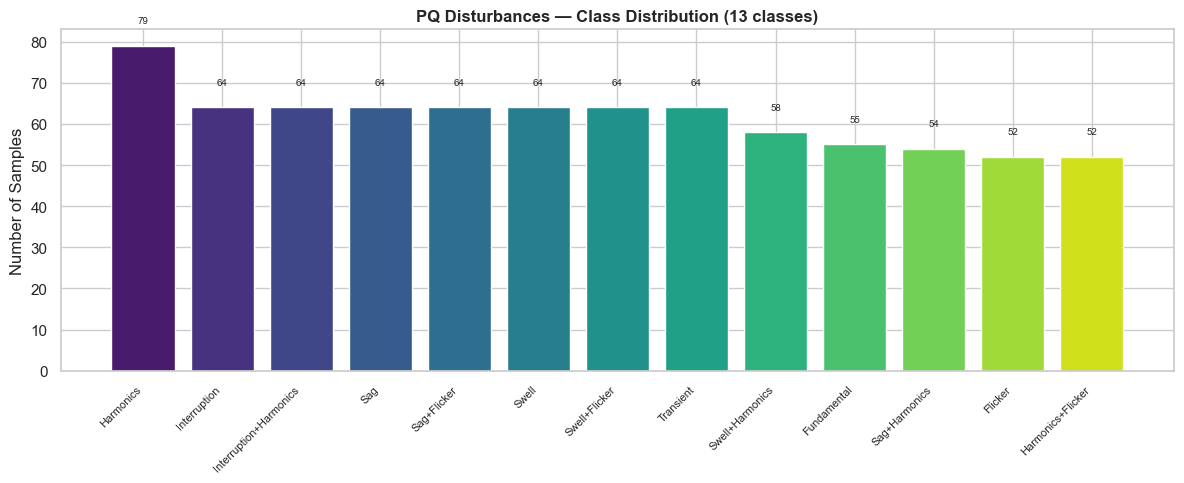

In [6]:
fig = plot_class_distribution(pq_labels, title='PQ Disturbances — Class Distribution (13 classes)')
fig.savefig('../results/figures/pq_class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [7]:
# PQ Disturbances summary
pq_df = load_pq_disturbances_as_dataframe(PQ_DIR)
pq_summary = []
for cls in sorted(pq_df['label'].unique()):
    cls_data = pq_df[pq_df['label'] == cls].drop(columns=['label'])
    pq_summary.append({
        'Class': cls,
        'Count': len(cls_data),
        'Feature Columns': cls_data.shape[1]
    })

pd.DataFrame(pq_summary)

,Class,Count,Feature Columns
0,Flicker,52,72
1,Fundamental,55,72
2,Harmonics,79,72
3,Harmonics+Flicker,52,72
4,Interruption,64,72
5,Interruption+Harmonics,64,72
6,Sag,64,72
7,Sag+Flicker,64,72
8,Sag+Harmonics,54,72
9,Swell,64,72


## 3. Dataset Comparison

| Property | XPQRS | PQ Disturbances |
|---|---|---|
| Data type | Raw waveform signals | Pre-extracted wavelet features |
| Samples per signal | 100 | N/A (72 features) |
| Total samples | 17,000 | ~798 |
| Classes | 17 | 13 |
| Balance | Perfectly balanced (1000/class) | Slightly imbalanced |
| Sampling rate | 5 kHz | N/A |
| Signal duration | 20 ms (1 cycle) | N/A |

In [8]:
# Overlapping classes between datasets
CLASS_MAP = {
    'Pure_Sinusoidal': 'Fundamental',
    'Sag': 'Sag',
    'Swell': 'Swell',
    'Interruption': 'Interruption',
    'Transient': 'Transient',
    'Harmonics': 'Harmonics',
    'Flicker': 'Flicker',
    'Harmonics_with_Sag': 'Sag+Harmonics',
    'Harmonics_with_Swell': 'Swell+Harmonics',
    'Flicker_with_Sag': 'Sag+Flicker',
    'Flicker_with_Swell': 'Swell+Flicker',
}

xpqrs_only = set(XPQRS_CLASSES) - set(CLASS_MAP.keys())
pq_only = set(np.unique(pq_labels)) - set(CLASS_MAP.values())

print(f'Overlapping classes: {len(CLASS_MAP)}')
print(f'XPQRS-only classes: {xpqrs_only}')
print(f'PQ-only classes   : {pq_only}')

Overlapping classes: 11
XPQRS-only classes: {'Swell_with_Harmonics', 'Sag_with_Harmonics', 'Notch', 'Swell_with_Oscillatory_Transient', 'Sag_with_Oscillatory_Transient', 'Oscillatory_Transient'}
PQ-only classes   : {'Harmonics+Flicker', 'Interruption+Harmonics'}


---
**Next:** [02_signal_visualization.ipynb](02_signal_visualization.ipynb) — Visualize the raw waveforms.